# ChemProp2

Updated on: "2022-09-20 20:07:07 CEST"

**Authors:** Abzer Kelminal (abzer.shah@uni-tuebingen.de) <br>
**Edited by:** Daniel Petras (daniel.petras@uni-tuebingen.de) <br>
**Accepted Input file formats:** .txt,.tsv and .csv files <br>
**Outputs:** .csv files, .svg images  <br>
**Dependencies:** ggplot2, dplyr, svglite

_______________________________________________________________________________________________________________________________
<div class="alert alert-block alert-warning">
    
Kindly download this Jupyter Notebook and run it in your local computer for successful running of the code. To know more about how to get the Jupyter Notebook running with R code, please have a look at this document: [GitHub Link](https://github.com/Functional-Metabolomics-Lab/Jupyter-Notebook-Installation/blob/main/Anaconda%20with%20R%20kernel%20installation.pdf)
    
    
<b><u><font size=3>SPECIAL NOTE:</u> </b>

- <b><font size=3> Please read the comments before proceeding with the code and let us know if you run into any errors and if you think it could be commented better. We would highly appreciate your suggestions and comments!! </font> </b>
- <b><font size=3> Also please look for any updates in GitHub page: [Functional-Metabolomics-Lab](https://github.com/Functional-Metabolomics-Lab/ChemProp2) </font></b>
</div>

## About the Notebook:
<div class="alert alert-block alert-success"> 
    
-  <p style='text-align: justify;'> Using this notebook, you will be able to determine the Chemical Proportionality (also known as ChemProp2) scores of the putative pairs in your feature-based molecular network (FBMN) and prioritize potential biotransformations within those networks. </p>

-  <p style='text-align: justify;'> Thus, the ChemProp2 script uses information from FBMN ouput, such as Network edge pair file, which contains information about all the pairs of nodes in a feature-based molecular network, the pairs being two structurally or chemically related compounds that are connected by an edge in the network.</p>
-  <p style='text-align: justify;'> <b><font color='red'>It is important to have sequential data (with respect to time or space) to perform ChemProp2 and a minimum of 2 sequential points (eg: a starting timepoint and an end timepoint) are necessary to observe the biotransformation.</font></b> ChemProp2 considers all data points in the sequence to find the correlation score between these possibly related compounds. </p> 
-  <p style='text-align: justify;'><b>The score ranges from -1 to 1 and highly anti-correlating pairs (with score closer to -1) could be a result of potential biotransformation.</b>  These scores can be then used to prioritize and visualize the directionality of these potential biochemical alterations directly in the molecular network. </p>


[Click the link for a better understanding of ChemProp2](https://www.functional-metabolomics.com/chemprop2) </div>

## The input files needed for ChemProp:

- <p style='text-align: justify;'> <b> Feature file </b> is obtained as an output of MZmine software. It contains all the MS/MS features (or peaks) with their corresponding intensities </p>
- <p style='text-align: justify;'> <b> Metadada: </b> Created by the user about the files used obtaining the feature table. The columns in a metadata should be created with the following format: filename (1st column having all the filenames in the same order as the columns in feature table), all the other columns with column name such as: ATTRIBUTE_yourDesiredAttribute. </p>
- <p style='text-align: justify;'><b> Network edge file </b> has the information of Feature IDs that are similar (not the same) in the columns 'Feature_ID_1' & 'Feature_ID_2'. This file is an output of GNPS </p>
- **Clusterinfo file** is an output of Feature-based Molecular Networking (FBMN)


<p style='text-align: justify;'> <font color="red"> Please have a look at the metadata used here for reference. Creating a metadata in the above-mentioned format is necessary for uploading the files in GNPS and to obtain a molecular network. </font></p>
_______________________________________________________________________________________________________________________________

# Package installation:

In [ ]:
# installing and calling the necessary packages
install.packages(c('ggplot2','dplyr','svglite'))
library(ggplot2)
library(dplyr)
library(svglite) # saving ggplots as svg

<b>Global settings for plot size in the output cell: </b> <br>
Uncomment (Remove #) the line according to the environment you are using to run the script (Google Colab or Jupyter Notebook) and comment the line (add # infront of the line) that you don't want to use. <br> Also, in the later sections with plot, if you are not satisfied with the plot size, you can simply change the height and width here

In [ ]:
options(repr.plot.width=10, repr.plot.height=8,res=600) #For google collab
#options(repr.plot.width=7, repr.plot.height=5) #For Jupyter Notebook

# Setting the working directory and creating a result directory:

### (1) For Google Colab Users:
<p style='text-align: justify;'> <font color='red'>For Google Colab, it is not possible to access the files from your local computer as it is hosted on Google's cloud server. An easier workaround is to upload the necessary files into the Google colab session using the 'Files' icon on the left as shown in the image. The code in the next cell creates a new folder 'My_TestData' in the Colab space and sets the folder as working directory. Following the steps in the image, you can check in your Colab to see if the folder has been created. Once you see it, simply upload the files from your local PC to the folder 'My_TestData' and then continue running the rest of the script.</font> </p>

<p style='text-align: justify;'>SPECIAL NOTE: All the files uploaded to Google Colab would generally disappear after 12 hours. Similarly, all the outputs would be saved only in the Colab, so we need to download them into our local system at the end of our session.</p> 

[Go to section: Getting outputs from Colab](#colab_output) 

In [ ]:
#Only for Google Colab:
dir.create("/content/My_TestData", showWarnings = TRUE, recursive = FALSE, mode = "0777")
setwd("/content/My_TestData")

![Google-Colab Files Upload](https://github.com/abzer005/Images-for-Jupyter-Notebooks/blob/main/StepsAll.png?raw=true)

### (2) For direct Jupyter Notebook Users:
<p style='text-align: justify;'> <font color='green'> <b> Setting a local working directory with Jupyter Notebook is very easy.</b> You can simply copy the path of the folder containing all your input files in your local computer to the output line of the next cell. It will be set as your working directory (or working folder)  </font></p> 
For ex: D:\User\Project\Test_Data <br>

In [ ]:
Directory <- normalizePath(readline("Enter the path of the folder with input files: "),"/",mustWork=FALSE)
setwd(Directory)

#Getting the working directory to check if we are at the right folder:
getwd()

Enter the path of the folder with input files: D:\Projects\Abzer\ChemProp2\20220907_Avermectin_GutBacteria\ChemProp Inputs


[1] "D:/Projects/Abzer/ChemProp2/20220907_Avermectin_GutBacteria/ChemProp Inputs"

### (3) Creating an automatic result directory:

In [ ]:
# Getting all the files in the folder
dirs <- dir(path=paste(getwd(), sep=""), full.names=TRUE, recursive=TRUE)
folders <- unique(dirname(dirs))
files <- list.files(folders, full.names=TRUE)
files_1 <- basename((files))
files_2 <- dirname((files))

# Creating a Result folder
dir.create(path=paste(files_2[[1]], "_ChemProp2_Results", sep=""), showWarnings = TRUE)
fName <-paste(files_2[[1]], "_ChemProp2_Results", sep="")

Warning message in dir.create(path = paste(files_2[[1]], "_ChemProp2_Results", sep = ""), :
"'D:\Projects\Abzer\ChemProp2\20220907_Avermectin_GutBacteria\ChemProp Inputs_ChemProp2_Results' already exists"

# Specifying the input files for ChemProp2 calculation:
In the following line, enter the required file index numbers such as: 1,2,3. The following code then gets the extension of these files(such as csv) and open them accordingly. The accepted file formats are csv, txt, tsv. You can also mention if you have cluster information file. If so, this will be used later ([More about this in the later section](#cluster_info)) to add the annotation information of your correlating pairs in the ChemProp result file. 

In [ ]:
IRdisplay::display(data.frame(INDEX=c(1:length(files_1)),Filename=files_1))
input <- as.double(unlist(strsplit(readline("Please specify the index number of feature-file, metadata, network edge file separated by commas:"), split=",")))

INDEX,Filename
1,20220919_GutBacteria_Avermectin_quant.csv
2,20220919_metadata_avermectin_gutbacteria.txt
3,clustersummary_file.tsv
4,Final_metadata_without_blanks.csv
5,Helper_functions_Chemprop2.ipynb
6,Helper_functions_Chemprop2.r
7,network_edge.tsv
8,Normalised_Quant_table.csv


Please specify the index number of feature-file, metadata, network edge file separated by commas:1,2,7


In [ ]:
#### Gets the extension of each file. Ex:csv
pattern <- c()
for (i in files_1){
  sep_file <- substr(i, nchar(i)-2,nchar(i))
  pattern <- rbind(pattern,sep_file)
}
#pattern

ft <- read.csv(files_1[input[1]],sep = ifelse(pattern[input[1]]!="csv","\t",","), header=TRUE, row.names = 1,check.names = FALSE) # By applying 'row.names = 1', the 1st column 'ID' becomes the row names
md <-read.csv(files_1[input[2]], sep = ifelse(pattern[input[2]]!="csv","\t",","), header=TRUE, row.names = 1,check.names = FALSE)
nw <-read.csv(files_1[input[3]], sep = ifelse(pattern[input[3]]!="csv","\t",","), header = TRUE,check.names = FALSE)

In [ ]:
#If you have cluster_info file:
read_cmd <- readline("Do you have Cluster information summary file? Y/N:")
if(casefold(read_cmd,upper=T)=='Y'){
     x <- as.double(readline("Enter the ID number of cluster info file:"))
    cl<- read.csv(files_1[x],sep=ifelse(pattern[x]!="csv","\t",","), header = TRUE,check.names = FALSE)    
}else if(casefold(read_cmd,upper=T) !='N'){print("Please enter either Y or N")}

Do you have Cluster information summary file? Y/N:y
Enter the ID number of cluster info file:3


Lets check if the data has been read correclty!!

In [ ]:
head(ft) #head function returns the header (upto first 6 rows)of each files.
dim(ft) #looking at the dimensions(rows & columns) of ft

,row m/z,row retention time,row ion mobility,row ion mobility unit,row CCS,correlation group ID,annotation network number,best ion,auto MS2 verify,identified by n=,...,GutBac_Rep3_t240.mzML Peak area,GutBac_Rep3_t20.mzML Peak area,GutBac_Rep3_t30.mzML Peak area,GutBac_Rep3_t720.mzML Peak area,GutBac_Rep3_t180.mzML Peak area,GutBac_Rep2_t20.mzML Peak area,GutBac_Rep2_t720.mzML Peak area,GutBac_Rep3_t1.mzML Peak area,GutBac_Rep3_t120.mzML Peak area,
524,150.0775,0.3365059,NA,NA,NA,NA,NA,,NA,NA,...,3550.589,18084.871,8549.794,5532.6200,3984.891,16944.318,6679.828,29543.668,10915.597,NA
3485,150.0915,2.1897998,NA,NA,NA,NA,NA,,NA,NA,...,2634.089,15989.818,6038.420,771.2174,6162.024,7341.516,5103.895,8737.668,9706.458,NA
3214,150.0915,1.9750485,NA,NA,NA,NA,NA,,NA,NA,...,1656.589,3361.084,4352.861,4754.7285,7141.970,5365.618,9812.270,1868.412,9656.993,NA
3042,150.0915,1.8714100,NA,NA,NA,144,NA,,NA,NA,...,13241.183,37411.246,15790.604,17183.4000,20183.488,16907.220,46171.043,22879.967,49095.688,NA
3626,150.0915,2.2835596,NA,NA,NA,271,NA,,NA,NA,...,29847.133,29131.953,25287.785,38065.9650,40818.773,24881.709,55919.880,31423.201,23706.062,NA
384,150.9512,0.2635833,NA,NA,NA,NA,NA,,NA,NA,...,0.000,0.000,0.000,0.0000,0.000,0.000,0.000,0.000,0.000,NA


[1] 3412   99

In [ ]:
head(md)
dim(md)

,ATTRIBUTE_sample,ATTRIBUTE_replicates,ATTRIBUTE_timepoint_minutes
Avr_Bac_Rep1_t0.mzML Peak area,Avermectin + Gut bacteria,1,0
Avr_Bac_Rep1_t1.mzML Peak area,Avermectin + Gut bacteria,1,1
Avr_Bac_Rep1_t10.mzML Peak area,Avermectin + Gut bacteria,1,10
Avr_Bac_Rep1_t120.mzML Peak area,Avermectin + Gut bacteria,1,120
Avr_Bac_Rep1_t180.mzML Peak area,Avermectin + Gut bacteria,1,180
Avr_Bac_Rep1_t20.mzML Peak area,Avermectin + Gut bacteria,1,20


[1] 86  3

In [ ]:
head(nw)
dim(nw)

CLUSTERID1,CLUSTERID2,ComponentIndex,Cosine,DeltaMZ
4665,5180,1,0.7252,18.010
2991,3274,2,0.8399,0.021
2196,3549,2,0.8259,-48.000
2991,3549,2,0.7675,-33.964
3162,3549,2,0.7899,-119.037
2196,3274,2,0.8067,-14.016


[1] 2843    5

In [ ]:
if(exists('cl')==T){head(cl)}
if(exists('cl')==T){dim(cl)}

ATTRIBUTE_replicates,ATTRIBUTE_sample,ATTRIBUTE_timepoint_minutes,Annotated Adduct Features ID,Best Ion,Correlated Features Group ID,G1,G2,G3,G4,...,SumPeakIntensity,UniqueFileSourcesCount,cluster index,componentindex,neutral M mass,number of spectra,parent mass,precursor charge,precursor mass,sum(precursor intensity)
NA,NA,NA,NA,,NA,0,0,0,0,...,1750421.4,83,524,-1,NA,83,150.0775,1,150.0775,1750421.4
NA,NA,NA,NA,,NA,0,0,0,0,...,578259.1,81,3485,-1,NA,81,150.0915,1,150.0915,578259.1
NA,NA,NA,NA,,NA,0,0,0,0,...,471243.9,82,3214,176,NA,82,150.0915,1,150.0915,471243.9
NA,NA,NA,NA,,144,0,0,0,0,...,1603448.5,83,3042,176,NA,83,150.0915,1,150.0915,1603448.5
NA,NA,NA,NA,,271,0,0,0,0,...,1928738.6,83,3626,-1,NA,83,150.0915,1,150.0915,1928738.6
NA,NA,NA,NA,,NA,0,0,0,0,...,1075031.1,47,384,-1,NA,47,150.9512,1,150.9512,1075031.1


[1] 3412   50

In [ ]:
#Loading in the helper functions from the additional R script:
#source(paste0(getwd(),'/Helper_functions_ChemProp2.r'))
source('https://raw.githubusercontent.com/Functional-Metabolomics-Lab/ChemProp2/main/Helper_functions_Chemprop2.r')

# Arranging the feature file and metadata:

<p style='text-align: justify;'> In this section, we are trying to bring the feature table and metadata in the correct format such as the rownames of metadata and column names of feature table are the same. They both are the file names and they need to be the same, as from now on, we will call the columns in our feature table based on our metadata information and this is necessary for the ChemProp2 calculation as well. Thus, using the metadata, the user can filter their data easily. You can also directly deal with your feature table without metadata by getting your hands dirty with some coding!! But having a metadata improves the user-experience greatly. <br>
Since metadata is created manually, it is possible to have some mistakes there occassionally. One such common mistake is error in naming the files. To avoid these, we give as much as information about our metadata to the script, so that it arranges the metadata in a compatible way to that of feature table. </p>

In [ ]:
if(readline("Is Metadata information given column-wise? Y/N:") == "N"){
  md <- as.data.frame(t(md))
} 

In [ ]:
new_ft <- ft
new_md <- md

#Removing Peak area extensions
colnames(new_ft) <- gsub(' Peak area','',colnames(new_ft))
rownames(new_md) <- gsub(' Peak area','',rownames(new_md))

new_md <- new_md[,colSums(is.na(new_md))<nrow(new_md)] #Removing if any NA columns present in the md file
rownames(new_md) <- trimws(rownames(new_md), which = c("both")) #remove the (front & tail) spaces, if any present, from the rownames of md

#Removing the spaces (if any) from each column of md and converting them all to UPPERCASE
for(i in 1:ncol(new_md)){
    if(is.factor(new_md[,i]) | is.character(new_md[,i]) == T){
        new_md[,i] <- trimws(new_md[,i], which = c("both")) #First remove spaces in the front and end of each column of md
        #new_md[,i] <- gsub(' ','_', new_md[,i]) # Replace the spaces (in the middle) to underscore
        #new_md[,i] <- factor(casefold(new_md[,i], upper=T)) #convert all to UPPERCASE
    } else if (is.numeric(new_md[,i]) | is.integer(new_md[,i]) | is.double(new_md[,i]) == T){
        new_md[,i] <- new_md[,i]
    }
}

#Getting the extension type of the files:
Ext<-readline('Give the extension of your filetype as given in both ft and md (Ex:mzML or mzXML):')
Ext <- gsub(" ","", Ext)  #remove if there is any space in the given input

new_ft <- new_ft[,grep(Ext,colnames(new_ft))] #getting only the columns with, for ex: mzml on its name
new_md <- new_md[grep(Ext,rownames(new_md)),] #getting only the rows with, for ex: mzxml on its name
Extra_ft <- ft[,-grep(Ext,colnames(ft))]

print(paste0("The no.of columns with ",Ext, " extension in new_ft is: ",ncol(new_ft)))
print(paste0("The no.of rows with ",Ext, " extension in new_md is: ",nrow(new_md)))
print(paste0("The no.of columns excluding ",Ext, " extension in new_ft is: ",ncol(Extra_ft)))

Give the extension of your filetype as given in both ft and md (Ex:mzML or mzXML):mzML
[1] "The no.of columns with mzML extension in new_ft is: 86"
[1] "The no.of rows with mzML extension in new_md is: 86"
[1] "The no.of columns excluding mzML extension in new_ft is: 13"


In [ ]:
new_ft<- new_ft[,order(colnames(new_ft))] #ordering the ft by its column names
new_md <-new_md[order(rownames(new_md)),] #ordering the md by its row names

#lists the colnames(ft) which are not present in md
unmatched_ft <- colnames(new_ft)[which(is.na(match(colnames(new_ft),rownames(new_md))))] 
cat("These", length(unmatched_ft),"columns of feature table are not present in metadata:")
if((length(unmatched_ft) %% 2) ==0)
{matrix(data=unmatched_ft,nrow=length(unmatched_ft)/2,ncol=2)}else
{matrix(data=unmatched_ft,nrow=(length(unmatched_ft)+1)/2,ncol=2)}

#lists the rownames of md which are not present in ft
unmatched_md <- rownames(new_md)[which(is.na(match(rownames(new_md),colnames(new_ft))))] 
cat("These", length(unmatched_md),"rows of metadata are not present in feature table:")
if((length(unmatched_md) %% 2) ==0)
{matrix(data=unmatched_md,nrow=length(unmatched_md)/2,ncol=2)}else
{matrix(data=unmatched_md,nrow=(length(unmatched_md)+1)/2,ncol=2)}

These 0 columns of feature table are not present in metadata:

[,1] [,2]

These 0 rows of metadata are not present in feature table:

[,1] [,2]

In [ ]:
#Removing those unmatching columns and rows:
if(length(unmatched_ft)!=0){new_ft <- subset(ft, select = -c(which(is.na(match(colnames(ft),rownames(md))))) )}
if(length(unmatched_md)!=0){new_md <- md[-c(which(is.na(match(rownames(md),colnames(ft))))),]}

#checking the dimensions of our new ft and md:
cat("The number of rows and columns in our original ft is:",dim(ft),"\n")
cat("The number of rows and columns in our new ft is:",dim(new_ft),"\n")
cat("The number of rows and columns in our new md is:",dim(new_md))

The number of rows and columns in our original ft is: 3412 99 
The number of rows and columns in our new ft is: 3412 86 
The number of rows and columns in our new md is: 86 3

Notice that the number of columns of feature table is same as the number of rows in our metadata. Now, we have both our feature table and metadata in the same order.

In [ ]:
new_ft<- new_ft[,order(colnames(new_ft))] #ordering the ft by its column names
new_md <-new_md[order(rownames(new_md)),] #ordering the md by its row names
#checking if they are the same
if(identical(colnames(new_ft),rownames(new_md))==T)
   {print("The column names of ft and row names of md are the same")}else{print("The column names of ft and row names of md are NOT THE SAME!!")}

[1] "The column names of ft and row names of md are the same"


# Subsetting the feature table and metadata based on user-defined condition: 

The function 'InsideLevels' gives an insight about the different levels (and their datatype) within each attribute in the metadata.

In [ ]:
InsideLevels(new_md)

INDEX,ATTRIBUTES,LEVELS,TYPE
1,ATTRIBUTE_sample,"Avermectin + Gut bacteria, Blank, Only Avermectin drug, Only Gut bacteria",character
2,ATTRIBUTE_replicates,"1, 2, 3",integer
3,ATTRIBUTE_timepoint_minutes,"0, 1, 10, 20, 30, 60, 120, 180, 240, 720",integer


The function 'SubsetLevels' can be used subset a dataframe using multiple attributes at a time as defined by the user. In addition to that, we can mention whether we want to keep or exclude certain levels within each selected attribute. It takes metadata table as its input

In [ ]:
subset_md <- SubsetLevels(new_md)

INDEX,ATTRIBUTES,LEVELS,TYPE
1,ATTRIBUTE_sample,"Avermectin + Gut bacteria, Blank, Only Avermectin drug, Only Gut bacteria",factor
2,ATTRIBUTE_replicates,"1, 2, 3",integer
3,ATTRIBUTE_timepoint_minutes,"0, 1, 10, 20, 30, 60, 120, 180, 240, 720",integer


Enter the IDs of interested attributes to subset (separaed by commas if more than one attribute):1,2


Index,Levels_ ATTRIBUTE_sample
1,Avermectin + Gut bacteria
2,Blank
3,Only Avermectin drug
4,Only Gut bacteria


Do you want to keep or exclude few conditions? K/E: K
Enter the index numbers of condition(s) you want to KEEP (separated by commas):1


Index,Levels_ ATTRIBUTE_replicates
1,1
2,2
3,3


Do you want to keep or exclude few conditions? K/E: E
Enter the index numbers of condition(s) you want to EXCLUDE (separated by commas):3
The condition(s) you want to exclude in  ATTRIBUTE_sample  : Blank Only Avermectin drug Only Gut bacteria 
The condition(s) you want to keep in  ATTRIBUTE_sample  : Avermectin + Gut bacteria 
The condition(s) you want to exclude in  ATTRIBUTE_replicates  : 3 
The condition(s) you want to keep in  ATTRIBUTE_replicates  : 1 2 


In [ ]:
InsideLevels(subset_md) #checking once again to see if it has been subsetted properly
dim(subset_md)

INDEX,ATTRIBUTES,LEVELS,TYPE
1,ATTRIBUTE_sample,Avermectin + Gut bacteria,factor
2,ATTRIBUTE_replicates,"1, 2",integer
3,ATTRIBUTE_timepoint_minutes,"0, 1, 10, 20, 30, 60, 120, 180, 240, 720",integer


[1] 20  3

In [ ]:
#Picking only the columns in ft that corresponds to the subset metadata
subset_ft <- new_ft[,which(colnames(new_ft)%in%rownames(subset_md)),drop=F] 
head(subset_ft)
dim(subset_ft)

,Avr_Bac_Rep1_t0.mzML,Avr_Bac_Rep1_t1.mzML,Avr_Bac_Rep1_t10.mzML,Avr_Bac_Rep1_t120.mzML,Avr_Bac_Rep1_t180.mzML,Avr_Bac_Rep1_t20.mzML,Avr_Bac_Rep1_t240.mzML,Avr_Bac_Rep1_t30.mzML,Avr_Bac_Rep1_t60.mzML,Avr_Bac_Rep1_t720.mzML,Avr_Bac_Rep2_t0.mzML,Avr_Bac_Rep2_t1.mzML,Avr_Bac_Rep2_t10.mzML,Avr_Bac_Rep2_t120.mzML,Avr_Bac_Rep2_t180.mzML,Avr_Bac_Rep2_t20.mzML,Avr_Bac_Rep2_t240.mzML,Avr_Bac_Rep2_t30.mzML,Avr_Bac_Rep2_t60.mzML,Avr_Bac_Rep2_t720.mzML
524,27304.035,14780.090,9930.010,8953.220,12140.231,15992.441,8518.392,9958.895,7201.776,10357.096,39486.890,15747.493,5745.212,17983.887,12868.86,10787.468,16397.277,14979.603,12981.848,13659.148
3485,9028.254,5287.457,1325.102,7946.866,7826.376,1879.519,5658.042,4501.610,1059.825,7458.882,9288.251,4521.984,819.437,8318.534,10383.44,2071.651,10262.720,6241.997,6242.431,7507.540
3214,10337.538,1340.567,1804.557,3840.084,1314.117,3934.395,3725.862,5386.379,1879.975,6719.124,6733.453,3150.732,0.000,8559.758,11605.14,2632.203,2907.499,3116.345,6255.333,3076.588
3042,20198.424,9521.226,1597.095,18760.146,22306.115,14964.937,14539.188,13750.015,8694.312,35267.965,20649.814,9875.870,3660.693,20401.460,25437.42,9876.574,23762.508,14275.658,15404.246,16441.710
3626,22780.066,10967.617,8993.703,25309.520,21451.334,19955.080,11906.312,22541.266,13818.427,20110.682,22399.535,13108.258,4461.326,18954.527,26262.06,12475.664,20631.514,18589.979,21014.190,16004.685
384,0.000,20237.707,10874.077,17114.330,19416.598,19494.580,13759.589,23699.592,14735.253,19090.182,0.000,11438.803,11502.341,19271.030,21315.41,19522.630,21594.658,21367.674,21709.219,19480.693


[1] 3412   20

### Selecting the metadata attribute to be used for ChemProp2 correlation calculation:
- <b><font color='red'>It is important to have the attribute in a numeric form as it is used in calculating ChemProp scores </font></b>. Hence, any letters, if present in the attribute, should be removed.
- The below lines pick the attribute containing the longitudinal data and does the above mentioned.

In [ ]:
if(exists("subset_md")==T){my_data <-subset_md}else{my_data <-new_md}
InsideLevels(my_data)

md_ID <- as.double(readline("Enter the Index number of the Attribute for calculating ChemProp2:"))
Meta_ChemProp <- my_data %>% select(contains(colnames(my_data)[md_ID]))

#Removing any characters in the Meta_ChemProp column and converting it to numeric type
Meta_ChemProp[,1]<- as.numeric(gsub("\\D+", "", Meta_ChemProp[,1]))
flush.console()
Sys.sleep(0.2)

head(Meta_ChemProp)
dim(Meta_ChemProp)
print(levels(as.factor(Meta_ChemProp[,1]))) #seeing the levels of the attribute for ChemProp calculation

INDEX,ATTRIBUTES,LEVELS,TYPE
1,ATTRIBUTE_sample,Avermectin + Gut bacteria,factor
2,ATTRIBUTE_replicates,"1, 2",integer
3,ATTRIBUTE_timepoint_minutes,"0, 1, 10, 20, 30, 60, 120, 180, 240, 720",integer


Enter the Index number of the Attribute for calculating ChemProp:3


,ATTRIBUTE_timepoint_minutes
Avr_Bac_Rep1_t0.mzML,0
Avr_Bac_Rep1_t1.mzML,1
Avr_Bac_Rep1_t10.mzML,10
Avr_Bac_Rep1_t120.mzML,120
Avr_Bac_Rep1_t180.mzML,180
Avr_Bac_Rep1_t20.mzML,20


[1] 20  1

 [1] "0"   "1"   "10"  "20"  "30"  "60"  "120" "180" "240" "720"


# Chemical Proportionality score:

- The below code adds a column of **Chemical Proportionality score** to the Nw_edge file. In addition to that, columns with information such as absolute values of ChemProp score and the sign of Chemprop scores are also added.
- In addition to ChemProp score using Pearson correlation method (which is ideal for linear transformations), the below code also generates scores using other methods such as spearman correlation, natural log transformation, square root transformations, for supporting non-linear data 

In [ ]:
if(exists("subset_ft")==T){Feature_file <-subset_ft}else{Feature_file <-new_ft}
head(Feature_file)
dim(Feature_file)

#If the rownames contains '_', means it has combined row information of ID, m/z, RT. We split the rownames back to its original:
if(grepl('_', rownames(Feature_file)[1], fixed = T)==T){
    Split_Values <- strsplit(as.character(rownames(Feature_file)),'_') 
    Feature_file <- data.frame(do.call(rbind, Split_Values),Feature_file)
    rownames(Feature_file) <- Feature_file[,1]
    Feature_file <- Feature_file[,-1:-3]
    colnames(Feature_file) <- gsub('X','',colnames(Feature_file))
    
    head(Feature_file)
}

,Avr_Bac_Rep1_t0.mzML,Avr_Bac_Rep1_t1.mzML,Avr_Bac_Rep1_t10.mzML,Avr_Bac_Rep1_t120.mzML,Avr_Bac_Rep1_t180.mzML,Avr_Bac_Rep1_t20.mzML,Avr_Bac_Rep1_t240.mzML,Avr_Bac_Rep1_t30.mzML,Avr_Bac_Rep1_t60.mzML,Avr_Bac_Rep1_t720.mzML,Avr_Bac_Rep2_t0.mzML,Avr_Bac_Rep2_t1.mzML,Avr_Bac_Rep2_t10.mzML,Avr_Bac_Rep2_t120.mzML,Avr_Bac_Rep2_t180.mzML,Avr_Bac_Rep2_t20.mzML,Avr_Bac_Rep2_t240.mzML,Avr_Bac_Rep2_t30.mzML,Avr_Bac_Rep2_t60.mzML,Avr_Bac_Rep2_t720.mzML
524,27304.035,14780.090,9930.010,8953.220,12140.231,15992.441,8518.392,9958.895,7201.776,10357.096,39486.890,15747.493,5745.212,17983.887,12868.86,10787.468,16397.277,14979.603,12981.848,13659.148
3485,9028.254,5287.457,1325.102,7946.866,7826.376,1879.519,5658.042,4501.610,1059.825,7458.882,9288.251,4521.984,819.437,8318.534,10383.44,2071.651,10262.720,6241.997,6242.431,7507.540
3214,10337.538,1340.567,1804.557,3840.084,1314.117,3934.395,3725.862,5386.379,1879.975,6719.124,6733.453,3150.732,0.000,8559.758,11605.14,2632.203,2907.499,3116.345,6255.333,3076.588
3042,20198.424,9521.226,1597.095,18760.146,22306.115,14964.937,14539.188,13750.015,8694.312,35267.965,20649.814,9875.870,3660.693,20401.460,25437.42,9876.574,23762.508,14275.658,15404.246,16441.710
3626,22780.066,10967.617,8993.703,25309.520,21451.334,19955.080,11906.312,22541.266,13818.427,20110.682,22399.535,13108.258,4461.326,18954.527,26262.06,12475.664,20631.514,18589.979,21014.190,16004.685
384,0.000,20237.707,10874.077,17114.330,19416.598,19494.580,13759.589,23699.592,14735.253,19090.182,0.000,11438.803,11502.341,19271.030,21315.41,19522.630,21594.658,21367.674,21709.219,19480.693


[1] 3412   20

In [ ]:
ChemProp2 <- c()
ChemProp_spearman <-c()
ChemProp_log <- c()
ChemProp_sqrt <- c()

for (i in 1:nrow(nw)) {
  
  x<- subset(Feature_file, rownames(Feature_file) == nw[i,1]) # rownames(Feature_file) is the feature ID or cluster ID. The subset command gets the 'Feature ID 1' from the first column of Nw_edge. Then picks the row from the Feature_file corresponding to the 'Feature ID 1'
  x<- rbind(x,subset(Feature_file, rownames(Feature_file) == nw[i,2]))
  # x is the subset data which has the Feature ID 1 and 2 specified according to Nw_edge file.
  reorder_id<-match(rownames(Meta_ChemProp),colnames(x)) #Match gives the position in which B (the column names of Meta data) is present in A (subset data) and store the position info in reorder_id 
  reordered_x <- data.frame(t(x[reorder_id])) #Rearranging x (subset data) with respect to the new positions and transposing it
  reordered_x <- cbind(Meta_ChemProp[,1],reordered_x) # Combining the metadata column (here, timepoint) with reordered_x
  #Thus, the resulting reordered_x contains 3 columns, such as: 'Metadata info(eg., Timepoint)', 'Feature ID 1', 'Feature ID 2'
  
  corr_result<-cor(reordered_x, method = "pearson") # Performing Pearson correlation
  ChemProp_score <- (corr_result[1,3] - corr_result[1,2]) / 2 # ChemProp2 score is obtained by: (Pearson(Feature ID 2) - Pearson(Feature ID 1)) / 2
  
  corr_2 <- cor(reordered_x, method = "spearman") # Performing Spearman correlation
  Score_spearman <- (corr_2[1,3] - corr_2[1,2]) / 2
  
  log_reorderedX <- cbind(reordered_x[,1],log(reordered_x[,2:3]+1)) # Performing natural log transformations on Feature IDs 1 and 2
  corr_3 <- cor(log_reorderedX) # performing (pearson) correlation on the log transformed data
  Score_log <-(corr_3[1,3] - corr_3[1,2]) / 2
  
  sqrt_reorderedX <- cbind(reordered_x[,1],sqrt(reordered_x[,2:3])) # Taking square roots of Feature IDs 1 and 2
  corr_4 <- cor(sqrt_reorderedX) # performing (pearson) correlation on the square roots
  Score_sqrt <- (corr_4[1,3] - corr_4[1,2])/2
  
  ChemProp2 <- rbind(ChemProp2, ChemProp_score, deparse.level = 0) # deparse.level = 0 constructs no labels; if not given, the resultant matrix has row names (for all rows) created from the input arguments such as 'ChemProp_score' here.
  ChemProp_spearman <- rbind(ChemProp_spearman,Score_spearman,  deparse.level = 0)
  ChemProp_log <- rbind(ChemProp_log,Score_log,  deparse.level = 0)
  ChemProp_sqrt <- rbind(ChemProp_sqrt, Score_sqrt, deparse.level = 0)
}
    
nw_new <- cbind (nw, ChemProp2,ChemProp_spearman,ChemProp_log,ChemProp_sqrt)
rownames(nw_new) <- NULL
#Nw_edge_new <- Nw_edge_new[order(Nw_edge_new$ChemProp2, decreasing = TRUE), ] # Rearranging Nw_edge_new in the decreasing order of ChemProp2 score

Abs_values <- abs(nw_new[,which( colnames(nw_new)=="ChemProp2" ):length(nw_new)])
colnames(Abs_values) <- paste("abs", colnames(Abs_values), sep = "_")

Sign_ChemProp2 <- sign(nw_new$ChemProp2) #getting only the sign of ChemProp2 as 1 or -1
         
ChemProp2_file <- cbind(nw_new,Abs_values,Sign_ChemProp2)

Warning message in cor(reordered_x, method = "pearson"):
"the standard deviation is zero"Warning message in cor(reordered_x, method = "spearman"):
"the standard deviation is zero"Warning message in cor(log_reorderedX):
"the standard deviation is zero"Warning message in cor(sqrt_reorderedX):
"the standard deviation is zero"Warning message in cor(reordered_x, method = "pearson"):
"the standard deviation is zero"Warning message in cor(reordered_x, method = "spearman"):
"the standard deviation is zero"Warning message in cor(log_reorderedX):
"the standard deviation is zero"Warning message in cor(sqrt_reorderedX):
"the standard deviation is zero"Warning message in cor(reordered_x, method = "pearson"):
"the standard deviation is zero"Warning message in cor(reordered_x, method = "spearman"):
"the standard deviation is zero"Warning message in cor(log_reorderedX):
"the standard deviation is zero"Warning message in cor(sqrt_reorderedX):
"the standard deviation is zero"Warning message in cor(reord

In [ ]:
head(ChemProp2_file)
write.csv(ChemProp2_file, paste0(fName,'/20220919_ChemProp2_GutBac_Avermectin.csv'),row.names = F)

CLUSTERID1,CLUSTERID2,ComponentIndex,Cosine,DeltaMZ,ChemProp2,ChemProp_spearman,ChemProp_log,ChemProp_sqrt,abs_ChemProp2,abs_ChemProp_spearman,abs_ChemProp_log,abs_ChemProp_sqrt,Sign_ChemProp2
4665,5180,1,0.7252,18.010,-0.08655895,0.02017037,-0.04980143,-0.061806689,0.08655895,0.02017037,0.04980143,0.061806689,-1
2991,3274,2,0.8399,0.021,0.02225235,0.17003872,0.16355969,0.087175514,0.02225235,0.17003872,0.16355969,0.087175514,1
2196,3549,2,0.8259,-48.000,0.19751705,0.25811505,0.10416864,0.202030160,0.19751705,0.25811505,0.10416864,0.202030160,1
2991,3549,2,0.7675,-33.964,0.20889307,0.36022875,0.34858765,0.286565260,0.20889307,0.36022875,0.34858765,0.286565260,1
3162,3549,2,0.7899,-119.037,-0.27443994,-0.24905838,-0.19215434,-0.231741764,0.27443994,0.24905838,0.19215434,0.231741764,-1
2196,3274,2,0.8067,-14.016,0.01087633,0.06792501,-0.08085932,0.002640415,0.01087633,0.06792501,0.08085932,0.002640415,1


## Plotting scatterplots to see interesting mass changes and saving them automatically onto result folder: (This section can be skipped)

The below condition gets the scatterplots of network pairs with ChemProp2 scores lower than -0.8. Instead of ChemProp2, one can aslo use 'DeltaMZ' to see plots for particular mass changes.  
For ex: <br>
`requiredRows <- which(Nw_edge_new$ChemProp2 < -0.8 & is.na(ChemProp2)!=T)` <br>
`requiredRows <- which(Nw_edge_new$DeltaMZ == -42.011 & is.na(ChemProp2)!=T)` 

In [ ]:
requiredRows <- which(nw_new$DeltaMZ == -14 & is.na(ChemProp2)!=T) 
print(paste0("No.of Scatter Plots in the Results Folder will be: ",length(requiredRows)))

[1] "No.of Scatter Plots in the Results Folder will be: 0"


**Check if you excluded the controls** from the feature and metadata 'Meta_ChemProp', if not, exclude it.<br>
Uncomment the line and rerun the cell to save the plots as svg: <br>
`svglite(filename=paste0(fName, "/ScatterPlot_RowNo_",i,"_ChemProp_",round(ChemProp_score[i],4), ".svg", sep=""), width=10, height=8, bg='white')`

In [ ]:
for (i in requiredRows){
  print(i)
  y<- subset(Feature_file, rownames(Feature_file) == nw[i,1]) # rownames(Feature_file) is the feature ID or cluster ID.
  y<- rbind(y,subset(Feature_file, rownames(Feature_file) == nw[i,2]))
  reordered_y <- data.frame(t(y[match(rownames(Meta_ChemProp),colnames(y))])) #Rearranging x (subset data) with respect to the new positions and transposing it
  reordered_y <- cbind(Meta_ChemProp[,1],reordered_y)  
  #reordered_y <- reordered_y[-grep('_C',rownames(reordered_y)),]   #Excluding the control rows from reordered_y
  
  par(mar=c(5,4,4,6), mgp=c(2, 1,0), cex.axis=1, cex.lab=1, cex.main=1,xpd=FALSE)
  #svglite(filename=paste0(fName, "/ScatterPlot_RowNo_",i,"_ChemProp_",round(ChemProp_score[i],4), ".svg", sep=""), width=10, height=8, bg='white')
  plot(reordered_y[,1],reordered_y[,2],pch=16,
       main=paste0("Scatter Plot of Feature IDs: ",gsub('X','',colnames(reordered_y[2]))," vs ",gsub('X','',colnames(reordered_y[3]))), 
       sub=paste0("ChemProp2 score: ",round(ChemProp_score,5)),
       col="red",xlab = MetaData_Name,
       ylab= paste0("Abundance: ID ",gsub('X','',colnames(reordered_y[2]))))
  
  par(new = TRUE) # Add a new secondary plot
  plot(reordered_y[,1],reordered_y[,3],pch=16, col="blue", # Create second plot without axes
       axes=FALSE, xlab = "", ylab = "")
  ymin = round(min(reordered_y[,3]),-1)
  ymax = round(max(reordered_y[,3]),-1)
  
  axis(side = 4, at =round(seq(ymin,ymax,length.out = 5)))   # Add second axis
  mtext( paste0("Abundance: ID ",gsub('X','',colnames(reordered_y[3]))), side = 4,line=2)  
  legend("top",inset=c(0.02,0),
         legend=c(gsub('X','ID ',colnames(reordered_y[2])), gsub('X','ID ',colnames(reordered_y[3]))),
         col=c("red", "blue"), 
         lty=1:2, cex=0.8,pch=16)
    
  dev.off()
}

# Combining the information from clusterinfo file onto ChemProp file:
<a id="cluster_info"></a>

In [ ]:
ChemProp_info <- c()
for (i in 1:nrow(ChemProp2_file)){
  y1<- subset(cl, ChemProp2_file[i,1] == cl$`cluster index`)
  colnames(y1) <- paste("Compound1", colnames(y1), sep = "_")
  y2<- subset(cl, ChemProp2_file[i,2] == cl$`cluster index`)
  colnames(y2) <- paste("Compound2", colnames(y2), sep = "_")
  Final <- cbind(ChemProp2_file[i,],y1[,31:ncol(y1)],y2[,31:ncol(y2)])
  ChemProp_info <- rbind(ChemProp_info,Final)
}

ChemProp_NAs_replaced <- ChemProp2_file %>% mutate_if(is.numeric, ~replace(., is.na(.), 0)) # NA values replaced with zeros

write.csv(ChemProp_info,paste0(fName,'/20220920_ChemProp2_Result_AlsoWithClusterInfo.csv'),row.names = F)
write.csv(ChemProp_NAs_replaced,paste0(fName,'/20220920_ChemProp2_replaced_NAs.csv'),row.names=F)

# Visualizing the distribution of different ChemProp scores of the sample data:

To save the histogram plot as svg plot, rerun the below cell after uncommenting (Remove #) the line: 
`svglite(filename=paste0(fName,"/HistPlot_Give_your_Desired_Name.svg",sep=""), width=10, height=8, bg='white')`

devSVG 
     3

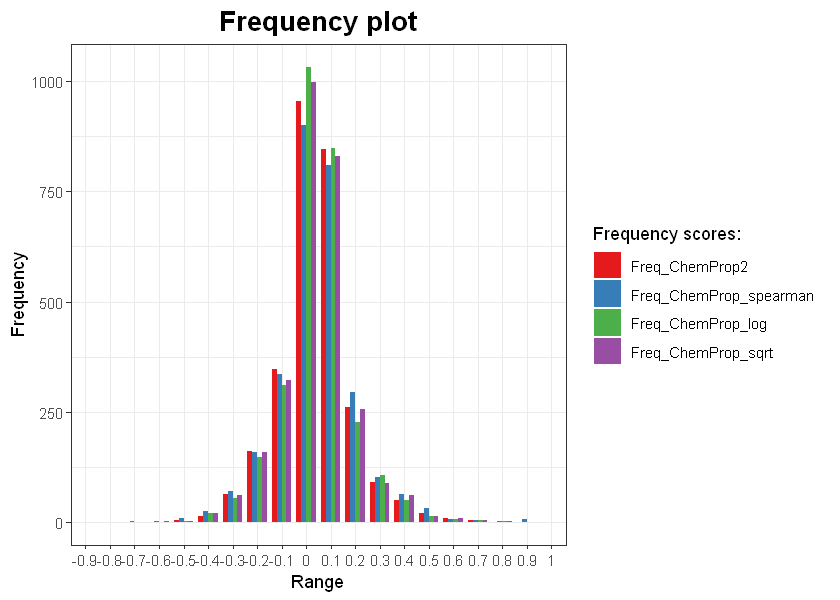

In [ ]:
bins <- seq(-1,1,0.1)
SCORES<- c()

for (i in (length(nw)+1):(length(nw)+4)){
  scores<- cut(as.matrix(ChemProp2_file[,i]),bins,labels=as.character(seq(-0.9,1,0.1))) #cut function store the data into the appropriate bins
  scores_table<-cbind(transform(table(scores)), Condition=paste0("Freq_",names(ChemProp2_file[i])))
  SCORES <- rbind(SCORES,scores_table)
}

HistPlot <- ggplot(SCORES, aes(scores, Freq, fill = Condition)) +
  geom_bar(stat="identity", position = "dodge", width=0.8) + 
  scale_fill_brewer(palette = "Set1") +
  ggtitle(label="Frequency plot") +
  theme(text = element_text(size=14)) +
  xlab("Range") + ylab("Frequency") + labs(fill = "Frequency scores:") + 
  theme(text = element_text(size=12,face="bold"),
        axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1),   # setting the angle for the x label
        axis.text.y = element_text(angle = 45, vjust = 0.5, hjust=1)) + # setting the angle for the y label
  theme_bw() + #white background and gray grid lines
  theme(plot.title = element_text(hjust = 0.5,size=16,face = "bold"))   # centering the plot title 

#svglite(filename=paste0(fName,"/20220920_HistPlot_GutBacteria_Avermectin_alone.svg",sep=""), width=10, height=8, bg='white')
HistPlot

dev.off()

## Getting output files from Google Colab:
<a id="colab_output"></a>
For Google Collab users, we can individually download all files from the Results folder which contains all the output files. Or we can zip the entire result folder using the next cell. <b><font color = 'red'>  Then, we can download the zip file directly from the folder "/content/My_TestData" into the local system </font></b>

In [ ]:
#Only for Google Colab
zip(zipfile = 'TestData_ChemProp2_Results', files = "/content/My_TestData_ChemProp2_Results/")